# SATISFACCIÓN DE VIAJEROS EN UNA COMPAÑIA AÉREA

Vamos a proceder con el estudio sobre la satisfacción de los viajeros de una compañía aérea. Primero haremos un simbólico EDA , donde veremos las diferentes variables y algunos datos anecdoticos de algunas de ellas.
Luego haremos un preproceado de los datos y a continuaciópn comenzaremos el Machine Learning. Donde explicaremos varios modelos y la métrica que utilizaremos en cada uno de ellos . 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\suert\OneDrive\Escritorio\Nueva carpeta\toda.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Las variables que son objeto de estudio son :

Género: Género de los pasajeros (Femenino, Masculino)

Tipo de cliente: el tipo de cliente :(cliente fiel, cliente desleal)

Edad: La edad real de los pasajeros.

Tipo de Viaje: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

Clase: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

Distancia de vuelo: la distancia de vuelo de este viaje

Servicio wifi a bordo: Nivel de satisfacción del servicio wifi a bordo (0: No aplicable; 1-5)

Hora de salida/llegada conveniente: Nivel de satisfacción de la hora de salida/llegada conveniente

Facilidad de reserva en línea: Nivel de satisfacción de la reserva en línea

Ubicación de la puerta: nivel de satisfacción de la ubicación de la puerta

Alimentos y bebidas: Nivel de satisfacción de Alimentos y bebidas

Embarque en línea: Nivel de satisfacción del embarque en línea

Comodidad del asiento: Nivel de satisfacción de Confort del asiento

Entretenimiento a bordo: Nivel de satisfacción del entretenimiento a bordo

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Servicio de sala de piernas: Nivel de satisfacción del servicio de sala de piernas

Manejo de equipaje: Nivel de satisfacción del manejo de equipaje

Servicio de Check-in: Nivel de satisfacción del servicio de Check-in

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Limpieza: Nivel de satisfacción de Limpieza

Retraso de salida en minutos: Minutos de retraso en la salida

Retraso de llegada en minutos: Minutos de retraso en la llegada

In [5]:

df.set_index('id', inplace=True)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 70172 to 34799
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880

In [7]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
df.columns


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

ANALISIS UNIVARIANTE

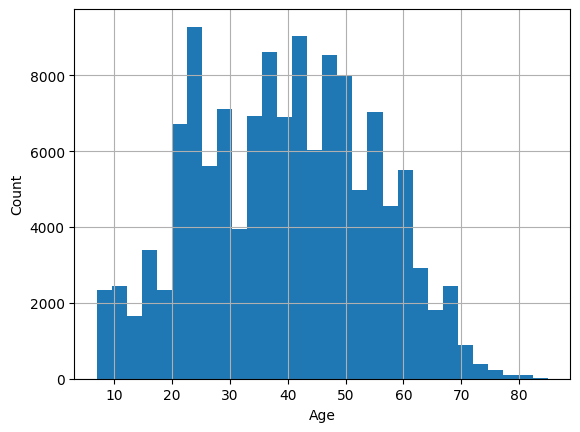

In [10]:
df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

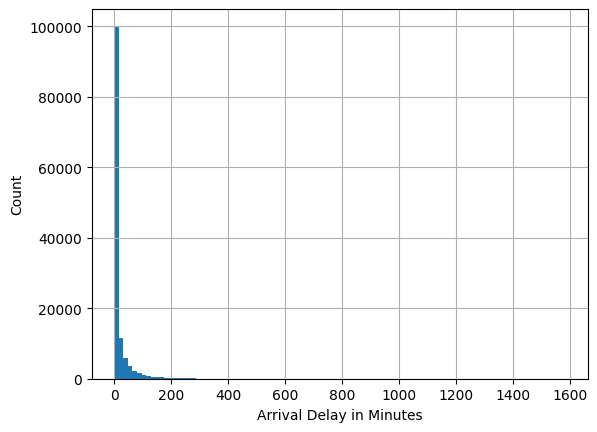

In [14]:
df['Arrival Delay in Minutes'].hist(bins=100)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Count')
plt.show()

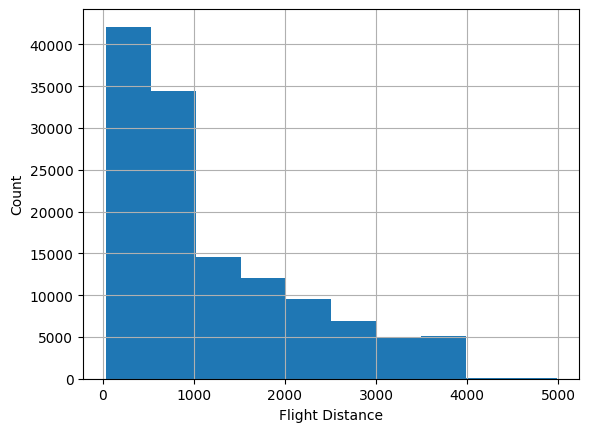

In [16]:
df['Flight Distance'].hist(bins=10)
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.show()

In [9]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

Vamos a comprobar si el target está balanceado o no

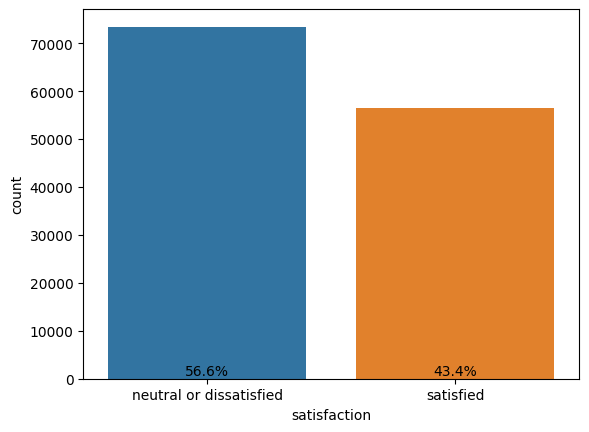

In [10]:
total_count = len(df) 
percentage = df['satisfaction'].value_counts() / total_count * 100

sns.countplot(x="satisfaction", data=df)

for index, value in enumerate(percentage):
    plt.text(index, value, f"{value:.1f}%", ha='center', va='bottom')


plt.show()

Podemos compronar que es un modelo que está bastante balanceado, ya que estan dividios en 56% y un 43%

In [11]:
nan= df.isna().sum()
nan

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Como podemos comprobar hay 393 valores nulos en una de las columnas, las quitaremos imputandoselos a la media

In [12]:
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].fillna(np.mean(df["Arrival Delay in Minutes"]))

Vamoos a comprobar los valores categóricos de las columnas object

In [13]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)
        print(df[i].unique(),"\n")

Gender
['Male' 'Female'] 

Customer Type
['Loyal Customer' 'disloyal Customer'] 

Type of Travel
['Personal Travel' 'Business travel'] 

Class
['Eco Plus' 'Business' 'Eco'] 

satisfaction
['neutral or dissatisfied' 'satisfied'] 



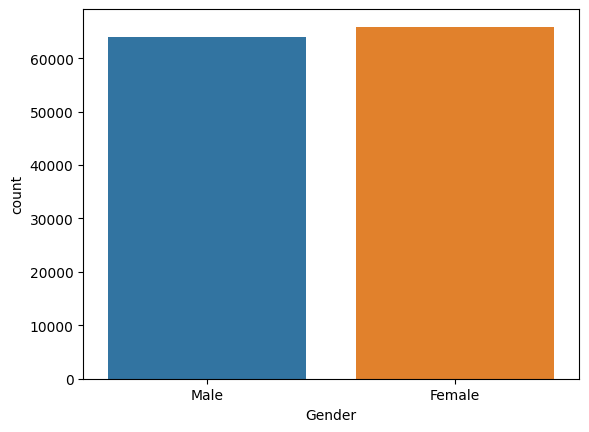

In [14]:
sns.countplot(x="Gender", data=df)
plt.show()

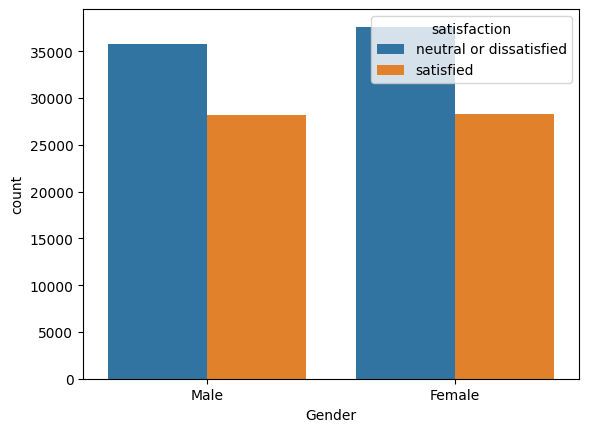

<Figure size 640x480 with 0 Axes>

In [15]:
sns.countplot(x="Gender", data=df, hue="satisfaction")
plt.show()
plt.savefig("gender.png")

<Axes: xlabel='Customer Type', ylabel='count'>

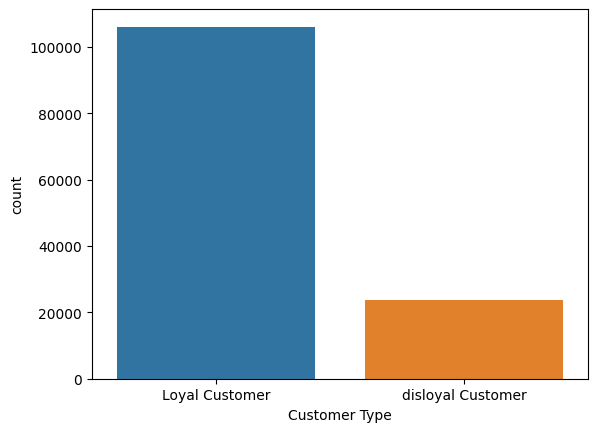

In [16]:
sns.countplot(x="Customer Type", data=df)

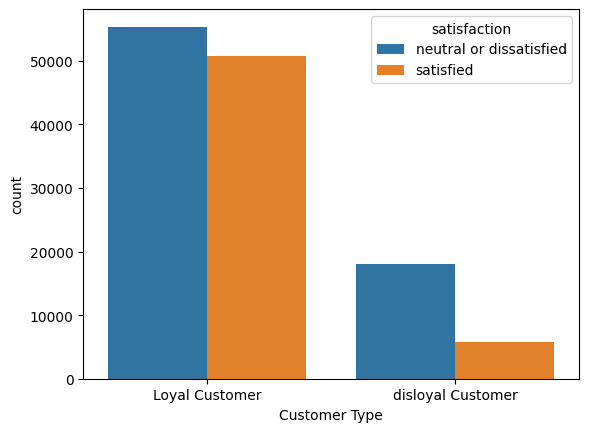

<Figure size 640x480 with 0 Axes>

In [17]:
sns.countplot(x="Customer Type", data=df, hue="satisfaction")
plt.show()
plt.savefig("customer.png")

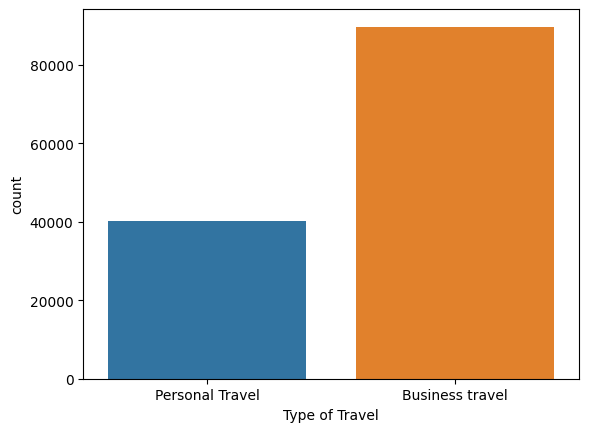

In [18]:
sns.countplot(x="Type of Travel", data=df)
plt.show()

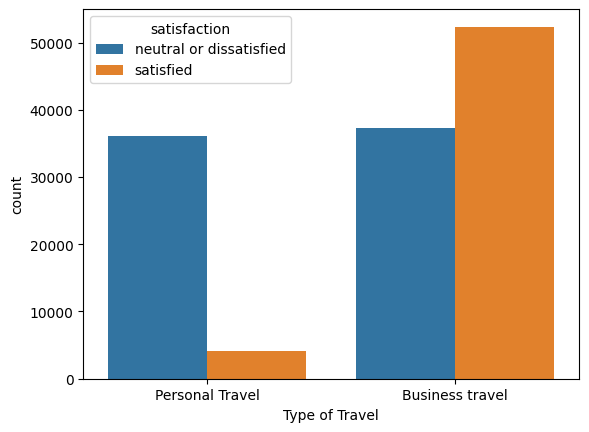

<Figure size 640x480 with 0 Axes>

In [19]:
sns.countplot(x="Type of Travel", data=df, hue="satisfaction")
plt.show()
plt.savefig("travel.jpg")

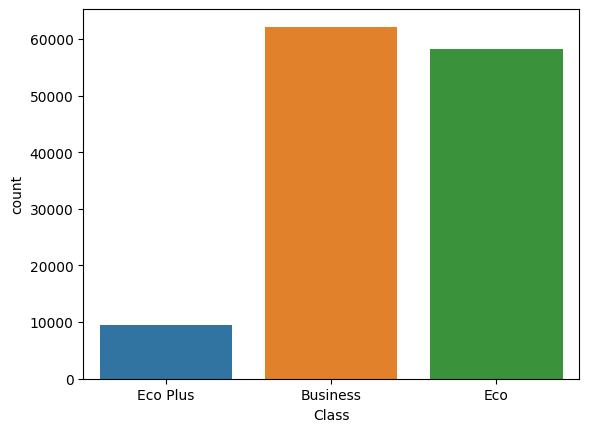

In [20]:
sns.countplot(x="Class", data=df)
plt.show()

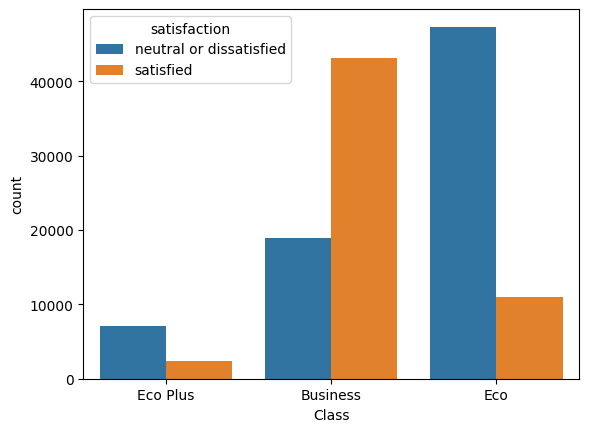

<Figure size 640x480 with 0 Axes>

In [21]:
sns.countplot(x="Class", data=df, hue="satisfaction")
plt.show()
plt.savefig("class.png")

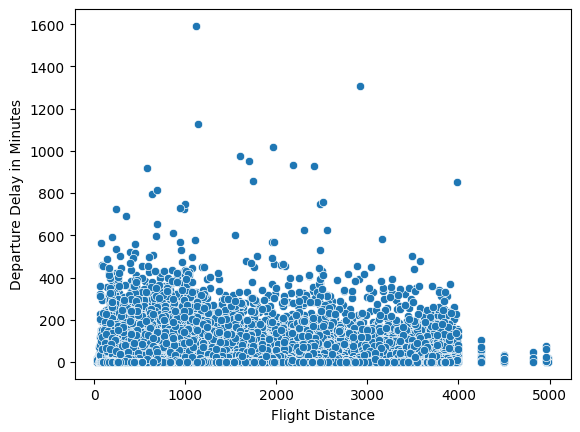

In [17]:
sns.scatterplot(x='Flight Distance', y='Departure Delay in Minutes', data=df)
plt.show()

In [22]:
numerical_columns = df.select_dtypes(include=np.number).columns 

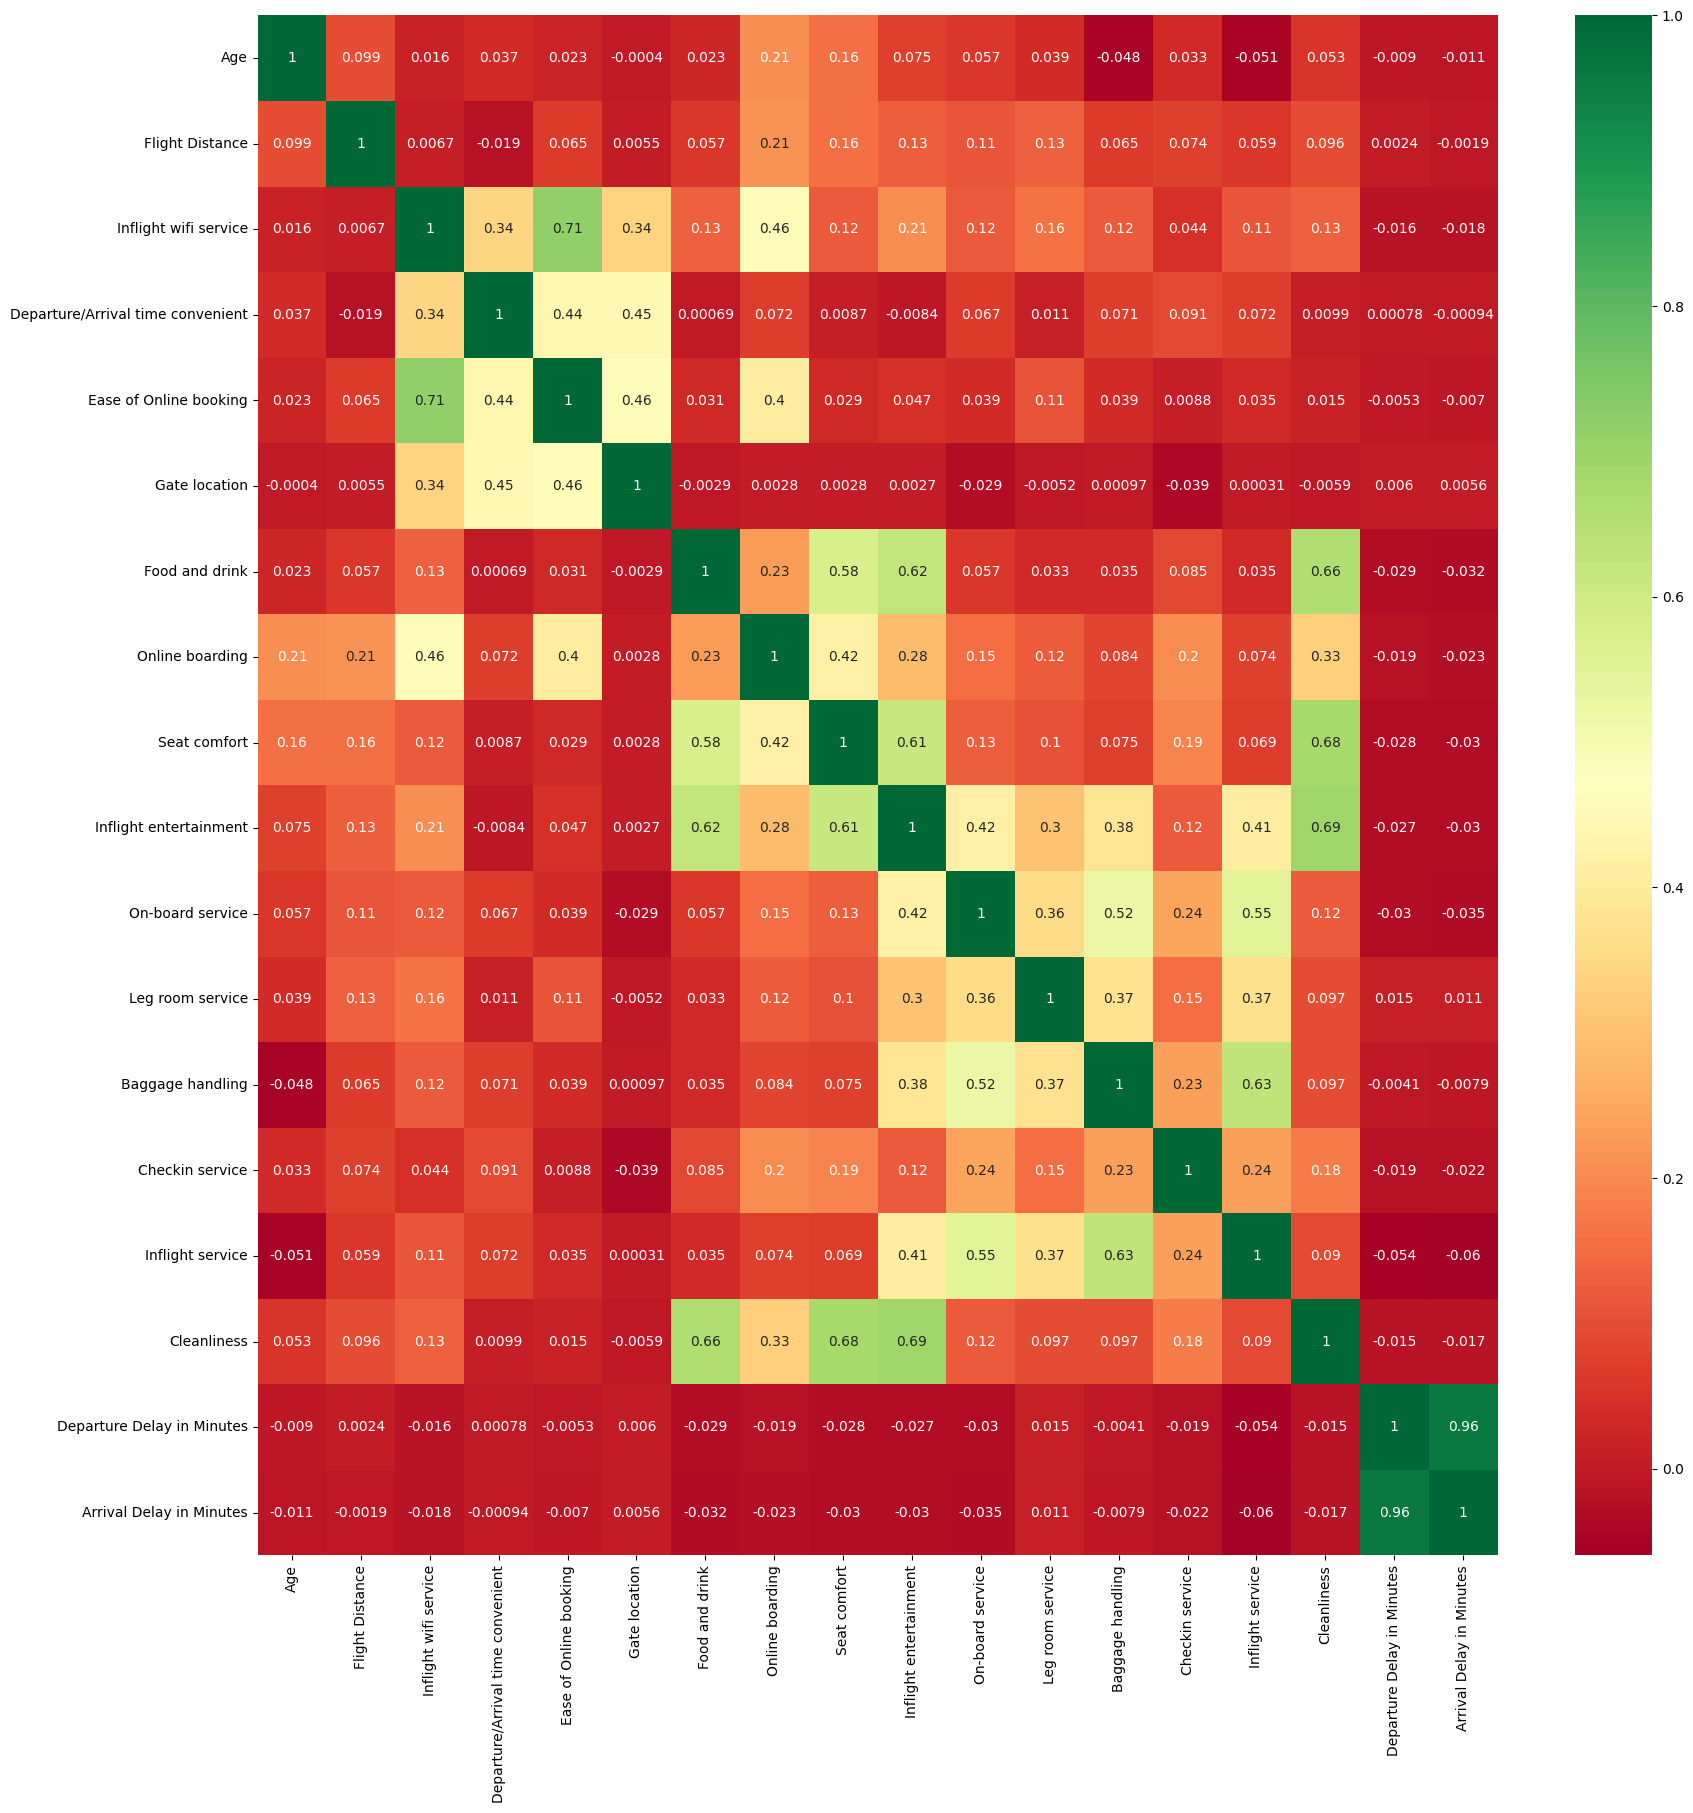

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="RdYlGn")
plt.show()


## Analisis Bivariante

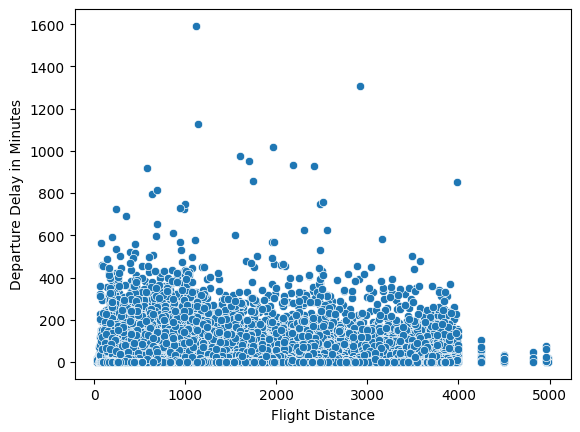

In [18]:
sns.scatterplot(x='Flight Distance', y='Departure Delay in Minutes', data=df)
plt.show()

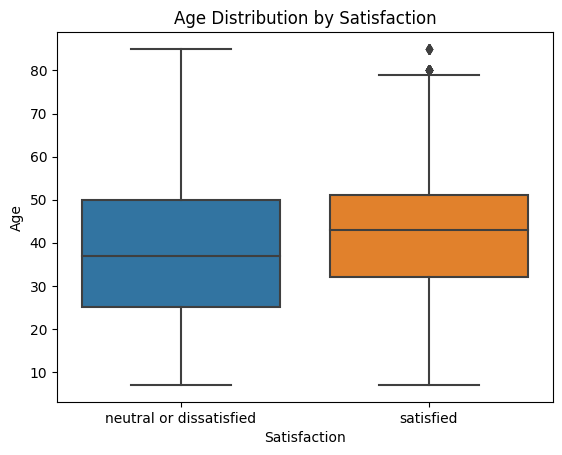

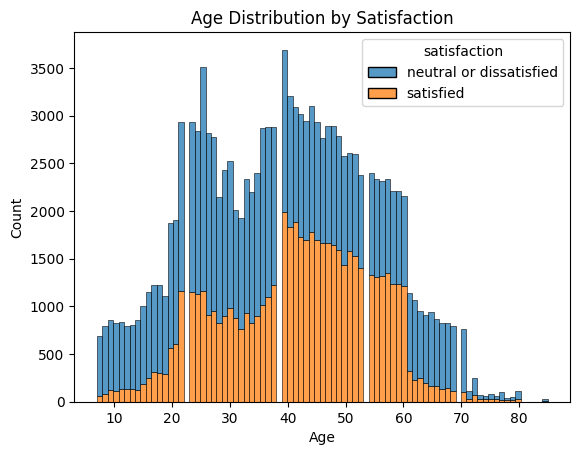

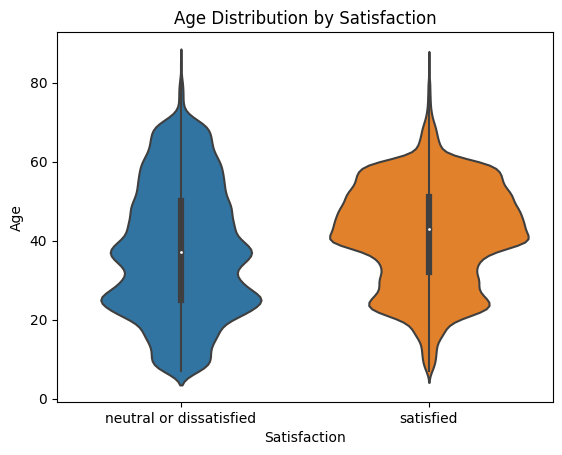

In [20]:
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.title('Age Distribution by Satisfaction')
plt.show()

# Histogram of Age by satisfaction
sns.histplot(data=df, x='Age', hue='satisfaction', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Satisfaction')
plt.show()

# Violin plot of Age by satisfaction
sns.violinplot(x='satisfaction', y='Age', data=df)
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.title('Age Distribution by Satisfaction')
plt.show()

## Preproceado


In [24]:
df["Gender"]=df["Gender"].astype("category")
df["Customer Type"]=df["Customer Type"].astype("category")
df["Type of Travel"]=df["Type of Travel"].astype("category")
df["Class"]=df["Class"].astype("category")

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 70172 to 34799
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  int64   
 7   Departure/Arrival time convenient  129880 non-null  int64   
 8   Ease of Online booking             129880 non-null  int64   
 9   Gate location                      129880 non-null  int64   
 10  Food and drink                     129880 non-null  int64   
 11  Online boarding             

In [26]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [27]:
df_dummies = pd.get_dummies(df[['Gender', 'Customer Type', 'Type of Travel', 'Class']])
df_dummies.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,
70172,False,True,True,False,False,True,False,False,True
5047,False,True,False,True,True,False,True,False,False
110028,True,False,True,False,True,False,True,False,False
24026,True,False,True,False,True,False,True,False,False
119299,False,True,True,False,True,False,True,False,False


In [28]:
df_dummies = df_dummies.replace({True: 1, False: 0})
df_dummies.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,
70172,0,1,1,0,0,1,0,0,1
5047,0,1,0,1,1,0,1,0,0
110028,1,0,1,0,1,0,1,0,0
24026,1,0,1,0,1,0,1,0,0
119299,0,1,1,0,1,0,1,0,0


In [29]:
df = pd.concat([df, df_dummies], axis=1)

In [30]:
df = df.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1)

In [31]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
70172,13,460,3,4,3,1,5,3,5,5,...,neutral or dissatisfied,0,1,1,0,0,1,0,0,1
5047,25,235,3,2,3,3,1,3,1,1,...,neutral or dissatisfied,0,1,0,1,1,0,1,0,0
110028,26,1142,2,2,2,2,5,5,5,5,...,satisfied,1,0,1,0,1,0,1,0,0
24026,25,562,2,5,5,5,2,2,2,2,...,neutral or dissatisfied,1,0,1,0,1,0,1,0,0
119299,61,214,3,3,3,3,4,5,5,3,...,satisfied,0,1,1,0,1,0,1,0,0


In [32]:
df.shape


(129880, 28)

## MACHINE LEARNING

Comenzamos con el MAchine Learning, Vamos a decifinir las variables y el taraget , y vamos a probar los modelos de Clasificación .

Vamos a definir las variables

In [33]:
X = df.drop(["satisfaction"], axis=1)
y = df["satisfaction"]

Comenzamos con el modelo Lienal Regresion

Tanto para este modelo como el de KNN vamos a estandarizar los datos ya que estos modelos no lo hacen de manera automática.

In [34]:
y_dict  = {'neutral or dissatisfied': 0, 'satisfied': 1}
y = df["satisfaction"].map(y_dict)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score,classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler_X_train = scaler.fit_transform(X_train)

scaler_X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(scaler_X_train, y_train)

y_pred=model.predict(scaler_X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print ("classification report: ",classification_report)
print("recall: ",recall)
print("precision: ",precision_score)
print ("f1 score: ",f1_s)

accuracy:  0.8752309824453341
confusion matrix:  [[13214  1408]
 [ 1833  9521]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.90      0.89     14622
           1       0.87      0.84      0.85     11354

    accuracy                           0.88     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.88      0.88      0.87     25976

recall:  0.8385590981152017
precision:  0.8711684509104218
f1 score:  0.8545527980972042


Continuamos con Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)


print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)
print("classification report: ",classification_report)
print("f1 score: ",f1_s)

accuracy:  0.9447182014166924
confusion matrix:  [[13906   716]
 [  720 10634]]
precision:  0.9369162995594713
recall:  0.9365862251189008
classification report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95     14622
           1       0.94      0.94      0.94     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

f1 score:  0.9367512332628611


Ahora vamos con el Radom Forest

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)
print("classification report: ",classification_report)
print("f1 score: ",f1_s)

accuracy:  0.962272867262088
confusion matrix:  [[14348   274]
 [  706 10648]]
precision:  0.9749130195934811
recall:  0.9378192707415889
classification report:                precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.97      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

f1 score:  0.9560064643562579


In [53]:
feature_importance = rfc.feature_importances_

for feature, importance in enumerate(feature_importance):
    print(f"Feature {feature}: {importance}")

Feature 0: 0.02817886343013555
Feature 1: 0.03171766505834663
Feature 2: 0.1385305580284167
Feature 3: 0.012901622592452613
Feature 4: 0.03540787038940949
Feature 5: 0.013995407441000429
Feature 6: 0.009910414619751824
Feature 7: 0.15355659926370566
Feature 8: 0.046092065320529986
Feature 9: 0.06417801613897589
Feature 10: 0.021915586387919725
Feature 11: 0.0316981112518234
Feature 12: 0.02559282000278332
Feature 13: 0.02371506012899129
Feature 14: 0.024449009710104046
Feature 15: 0.02566009279661688
Feature 16: 0.010330983383619381
Feature 17: 0.011688735099629
Feature 18: 0.003181213446710389
Feature 19: 0.0028243704426241687
Feature 20: 0.02846392032130172
Feature 21: 0.022142700942669156
Feature 22: 0.052180520744438914
Feature 23: 0.05853581975757513
Feature 24: 0.07198381044105315
Feature 25: 0.04914973316964199
Feature 26: 0.002018429689773549


Adaboost

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)
print("classification report: ",classification_report)
print("f1 score: ",f1_s)

accuracy:  0.9254696643055128
confusion matrix:  [[13778   844]
 [ 1092 10262]]
precision:  0.924005042319467
recall:  0.903822441430333
classification report:                precision    recall  f1-score   support

           0       0.93      0.94      0.93     14622
           1       0.92      0.90      0.91     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976

f1 score:  0.9138023152270704


CatBoost

In [49]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)

y_pred = catboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)

print("f1 score: ",f1_s)

Learning rate set to 0.074823
0:	learn: 0.5985265	total: 30ms	remaining: 30s
1:	learn: 0.5194191	total: 53.3ms	remaining: 26.6s
2:	learn: 0.4315871	total: 80.5ms	remaining: 26.8s
3:	learn: 0.3842738	total: 104ms	remaining: 26s
4:	learn: 0.3490324	total: 127ms	remaining: 25.2s
5:	learn: 0.3230671	total: 153ms	remaining: 25.3s
6:	learn: 0.2947948	total: 177ms	remaining: 25.1s
7:	learn: 0.2762708	total: 197ms	remaining: 24.4s
8:	learn: 0.2596140	total: 225ms	remaining: 24.7s
9:	learn: 0.2414952	total: 255ms	remaining: 25.2s
10:	learn: 0.2321572	total: 283ms	remaining: 25.4s
11:	learn: 0.2181191	total: 318ms	remaining: 26.1s
12:	learn: 0.2071586	total: 345ms	remaining: 26.2s
13:	learn: 0.2009947	total: 378ms	remaining: 26.6s
14:	learn: 0.1921661	total: 406ms	remaining: 26.6s
15:	learn: 0.1856169	total: 432ms	remaining: 26.6s
16:	learn: 0.1791535	total: 459ms	remaining: 26.5s
17:	learn: 0.1753645	total: 490ms	remaining: 26.7s
18:	learn: 0.1706037	total: 516ms	remaining: 26.6s
19:	learn: 0.1

Gradient boosting

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grad = GradientBoostingClassifier()
grad.fit(X_train, y_train)

y_pred = grad.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)

print("f1 score: ",f1_s)

accuracy:  0.9405990144748999
confusion matrix:  [[14031   591]
 [  952 10402]]
precision:  0.9462385154189029
recall:  0.9161528976572133
f1 score:  0.9309527005862085


XGBoost

In [57]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)

print("f1 score: ",f1_s)

accuracy:  0.9636202648598706
confusion matrix:  [[14342   280]
 [  665 10689]]
precision:  0.9744735162731334
recall:  0.9414303329223181
f1 score:  0.9576669802445908


Continuamos con SVM

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

super_svm = SVC()

super_svm.fit(X_train, y_train)

y_pred = super_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)
print("classification report: ",classification_report)
print("f1 score: ",f1_s)

accuracy:  0.6657684016014783
confusion matrix:  [[12184  2438]
 [ 6244  5110]]
precision:  0.6770005299417065
recall:  0.45006165228113443
classification report:                precision    recall  f1-score   support

           0       0.66      0.83      0.74     14622
           1       0.68      0.45      0.54     11354

    accuracy                           0.67     25976
   macro avg       0.67      0.64      0.64     25976
weighted avg       0.67      0.67      0.65     25976

f1 score:  0.5406835255528516


Acabamos con KNN

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, classification_report



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler_X_train = scaler.fit_transform(X_train)

scaler_X_test = scaler.transform(X_test)

knnmodel = KNeighborsClassifier()

knnmodel.fit(scaler_X_train, y_train)

y_pred=knnmodel.predict(scaler_X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

print("accuracy: ",accuracy)
print("confusion matrix: ",confusion_matrix)
print("precision: ",precision)
print("recall: ",recall)
print("classification report: ",classification_report)
print("f1 score: ",f1_s)

accuracy:  0.9259316291961811
confusion matrix:  [[14111   511]
 [ 1413  9941]]
precision:  0.9511098354381936
recall:  0.8755504667958429
classification report:                precision    recall  f1-score   support

           0       0.91      0.97      0.94     14622
           1       0.95      0.88      0.91     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976

f1 score:  0.9117674034669357


Como hemos visto el Random Forest es el mejor modelo ya quue es el que menos falsos positivos y falsos negativos en la matriz de confusión y tiene las mejores métricas . También vamos a quedarnos con la métrcia de Accuracy, ya que es la mas indicada cuando la target está balanceada.

In [38]:
from sklearn.model_selection import cross_val_score

num_folds = 5 
cv_scores = cross_val_score(rfc, X, y, cv=num_folds, scoring='accuracy')
print("Resultados de Cross-Validation (Accuracy) en cada partición:")
print(cv_scores)
print("Precisión media (Accuracy):", np.mean(cv_scores))
print("Desviación estándar (Accuracy):", np.std(cv_scores))

Resultados de Cross-Validation (Accuracy) en cada partición:
[0.96208038 0.96354327 0.96308131 0.96550662 0.96373576]
Precisión media (Accuracy): 0.9635894672004927
Desviación estándar (Accuracy): 0.0011166540742400587


Una vez heco el CV  vamos a  hacer un grid Search para comprobar cuales serian los hiperparámetros que serian óptimos y ver cuanto mejora el modelo.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [120],    
              "max_depth": [3,4,5,6,10,15,17],
               "max_features": ["sqrt", 3, 4] 
             }

rdf = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rdf, param_grid=param_grid, cv=5)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


best_rdf = RandomForestClassifier(**best_params)
best_rdf.fit(X_train, y_train)


y_pred = best_rdf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print("Precisión del accuracy con los mejores hiperparámetros:", accuracy)



Mejores hiperparámetros: {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 120}
Precisión del accuracy con los mejores hiperparámetros: 0.9613874345549738


Una vez averiguado cuales son los mejores hiperparámetros, guardamos nuestro modelo para poderlo usarlo en una nuestra web

In [58]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=17, n_estimators=120)

In [59]:
from joblib import dump

dump(grid_search.best_estimator_, 'new_model.joblib') 

['new_model.joblib']

Por último , este es el enlace de la app que hemos productivizado para que nuestra modelo pueda ser predecido por nuestros cliente:

http://aviones.h6hyfrgzhvbugrfz.westeurope.azurecontainer.io/